The perceptron algorithm is used for binary classification. We are creating a function that takes in a vector of n "feature values", and maps this vector to either category A or category B. For example, a feature vector with 2 features might be the length and width of a flower's petals. A binary classifier would map these two observations to a category, perhaps deciding between tulip or daffodil. To get the ball rolling, first lets import our dependencies.

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We need our perceptron to map inputs to one of two binary categories. The sigmoid function will help with this. Run the next cell to define the sigmoid function and its derivative.

In [0]:
def sigmoid(x):
  return 1.0/(1.0 + math.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

The perceptron algorithm has a "weight" for each dimension of the input vector. Using the example from before, if we have two input features, flower petal length and petal width, the perceptron would need one weight value for each of these, for a total of two. Additionally, the perceptron maintains one other value, called the "bias". To classify a flower, we multiply its petal length times the first weight, multiply its petal width times the second weight, and then add the bias:  z = petal_length * weight1 + petal_width * weight2 + bias

Now, consider the possible values that z can take... Remember, we want this function to map the input to a *binary categorical* value, but right now z is continuous and real valued, can take on any value fron -infinity to infinity. To turn z into a binary categorical, we have many options. One good option is the heaviside step function, which takes the value 0 when z < 0 and takes the value 1 when z > 0

However, there is one big problem with step functions in general that make them very difficult to work with. Their derivatives are always zero! Our perceptron algorithm uses the gradient of this function to improve its weights and bias over time (in a process called first order optimization). To make the perceptron work, we need a *surrogate* loss function, a function similar to the heaviside step function that *has a usable derivative.* This is where the sigmoid function comes in. Run the next cell to see how the sigmoid function is very similar to the heaviside step but has a non-zero gradient.

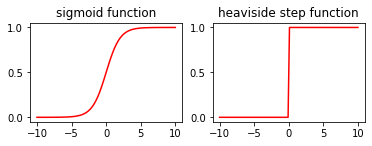

In [0]:
x = np.linspace(-10,10,100)
y = 1.0/(1.0 + math.e**(-x))

x_ = np.linspace(-10,10,100)
y_ = np.heaviside(x_, 0.5)

fig = plt.figure()
plt.subplot(221)
plt.title("sigmoid function")
plt.plot(x,y, 'r')

plt.subplot(222)
plt.title("heaviside step function")
plt.plot(x_ ,y_ , 'r')

plt.show()

This next cell will initialize the hyperparameters as well as the training data that we will use to train our perceptron. The lr or learning rate is a hyperparameter that determines how aggresively (how large of a step size we should use) we update our weights. Below, I have plotted our input data. The perceptron will try to find a linear decision boundary to separate the yellow points from the purple. On one side of the linear boundary, sigmoid(w transpose x + bias) > 0.5. On the other, this function is less than 0.5. It has been proven that perceptrons will always find a correct linear decision boundary if such a boundary exists. Keep this in mind! If no linear decision boundary exists, the perceptron cannot correctly classify all of the data points. Do you think the data below is linearly seperable?

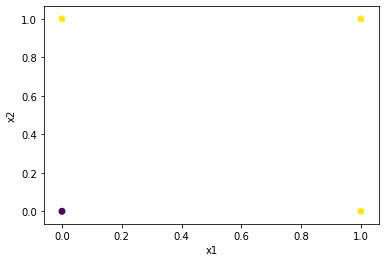

In [10]:
#Run this cell to use the perceptron to learn the OR function on two inputs
lr = 0.01
training_examples = 4
n_features = 2
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([0, 1, 1, 1])
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

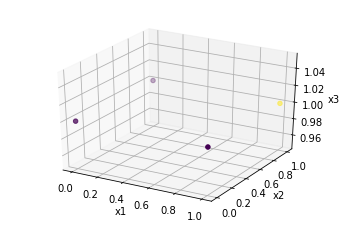

In [0]:
#Run this cell to use the perceptron to learn the function on three inputs
lr = 0.01
training_examples = 4
n_features = 3
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([0, 0, 0, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
ax.dist = 11
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

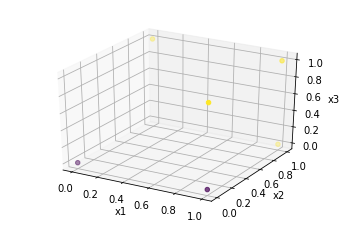

In [9]:
#Run this cell to use the perceptron to learn the another function on three inputs
lr = 0.01
training_examples = 6
n_features = 3
x = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 0, 1, 1, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
ax.dist = 11
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

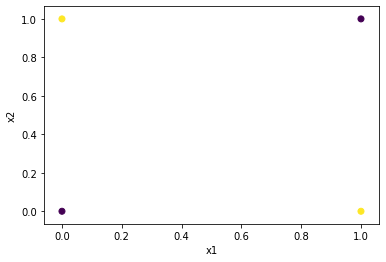

In [0]:
#Run this cell to use the perceptron to learn the exclusive or (X-OR) function
lr = 0.01
training_examples = 4
n_features = 2
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([0, 1, 1, 0])
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Here it is! The whole learning algorithm. In this case, we are setting our bias permanently to zero, and only learning the weights, although we could also choose to learn the bias as well. When the perceptron is instantiated, its weights are set to random values, corresponding to a random linear decision boundary. Then, for each datapoint in our training data, we evaluate how "wrong" our perceptron is for that specific training datapoint. We then make a small update to our weights to improve them, and move on to the next datapoint. Once we have made updates for every point in the dataset, we have completed one *epoch*. The number of epochs we choose to use is a hyperparameter. We want to choose enough epochs for the the perceptron to learn acceptable weights, but not so many that the algorithm takes forever to run. In short, we iteratively improve an initially random linear decision boundary many many times.

The meat of the learning occurs in the update step:
```
for k in range(n_features):
          self.weights[k] -= lr*(sigmoid(dot_product) - y[example])*sigmoid_prime(dot_product)*training_inputs[example][k]
```
On a high level this means the following... We are looking at a specific training datapoint with n_features features/x values. We first find how "wrong" our prediction/formula is for this specific datapoint. "Wrongness" is encoded by sigmoid((x_values dot weights)+ bias) - y[example]. Both the sigmoid function and our y values can take values between 0 and 1. If our perceptron has the correct prediction, then sigmoid((x_values dot weights)+ bias) - y[example] is approx equal to zero. If our perceptron is incorrect, then this value is approx 1. Therefore, multiplying by this factor means we only update the weights when our perceptron gets an incorrect answer! Otherwise, the update step gets multiplied by zero. 

The other two components of the update step are the learning rate and the gradient. The learning rate is just a hyperparameter that scales the updates. The gradient is what tells us how to change the perceptron's weights to improve its prediction. For each feature in this specific trainng example, we calculate the derivative of the sigmoid loss function with respect to each individual wieght. If the classifier was incorrect on this example, we improve each weight by taking a small step "downhill" using the derivative of the sigmoid function with respect to the perceptron weights. In other words, this formula improves the weights slightly for each training weight of each training example.

In [0]:
class Perceptron(object):

  #constructor for the perceptron, initilizes member variables such as number of epochs
  def __init__(self, no_of_inputs,  learning_rate=0.01, epoch = 10, print_progress = True):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.print_progress = print_progress
        self.weights = np.random.normal(0, 1, 3)

  #returns dot product of two vectors, in this case, weight_vector dot x_n, where x_n is the nth training example
  def dot(self, example, training_inputs):
    sum = 0.0
    for k in range(n_features):
      sum += self.weights[k] * training_inputs[example][k]
    return sum

  #returns the current predicted value of y given a training input x_n
  def predict(self, example, training_inputs):
    return sigmoid(self.dot(example, training_inputs))

  #training the perceptron based on the following algorithm:
  #for each epoch, for each training example update the perceptron weights based on the learning rate and update formula
  def train(self, training_inputs, labels):
    for i in range(self.epoch):
      for example in range(training_examples):
        dot_product = self.dot(example, training_inputs)
        for k in range(n_features):
          self.weights[k] -= lr*(sigmoid(dot_product) - y[example])*sigmoid_prime(dot_product)*training_inputs[example][k]
      
      #All the learning is done above! Code below is just for printing results
      if(self.print_progress):
        print("epoch: ", i, " weights: ", end = "")
        for w in range(self.weights.size):
          print(round(self.weights[w], 2)," ", end = "")
        print("predictions: ", end = "")
        for p in range(training_examples):
          print(self.predict(p, training_inputs), " ", end = "")
        print()

    print("Final predictions: ", end="")
    for p in range(training_examples):
      print(round(self.predict(p, training_inputs), 0), " ", end = "")

All that's left now is to instantiate a perceptron and train it! The arguments to create a perceptron are the number of features in your input, the learning rate, the number of epochs, and whether or not you'd like to monitor your progress by printing the current weights and predictions after each epoch.

In [11]:
p = Perceptron(n_features, 0.01, 10000, True)
p.train(x, y)

epoch:  0  weights: 1.9  0.72  0.08  predictions: 0.5  0.8698136000247828  0.671870885718765  0.9318823796144973  
epoch:  1  weights: 1.9  0.72  0.08  predictions: 0.5  0.8698351807668154  0.67203986103234  0.9319431126603865  
epoch:  2  weights: 1.9  0.72  0.08  predictions: 0.5  0.8698567449595555  0.6722086513774995  0.9320037475653019  
epoch:  3  weights: 1.9  0.72  0.08  predictions: 0.5  0.8698782926336901  0.6723772570104574  0.9320642845472246  
epoch:  4  weights: 1.9  0.72  0.08  predictions: 0.5  0.8698998238198195  0.6725456781871015  0.9321247238235445  
epoch:  5  weights: 1.9  0.72  0.08  predictions: 0.5  0.8699213385484559  0.6727139151629928  0.9321850656110617  
epoch:  6  weights: 1.9  0.72  0.08  predictions: 0.5  0.8699428368500248  0.672881968193366  0.9322453101259875  
epoch:  7  weights: 1.9  0.72  0.08  predictions: 0.5  0.8699643187548648  0.6730498375331294  0.9323054575839477  
epoch:  8  weights: 1.9  0.72  0.08  predictions: 0.5  0.8699857842932284  0